In [15]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from keras.layers import GlobalMaxPooling2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.models import Model
from keras import regularizers, optimizers
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from keras import layers
from keras.optimizers.experimental import  SGD

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 423864852523711235
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5866782720
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4349175777447134402
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


2023-12-16 23:04:48.195372: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-16 23:04:48.343751: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-16 23:04:48.343791: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-16 23:04:48.544317: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-16 23:04:48.544434: I external/local_xla/xla/stream_executor

In [3]:
from keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

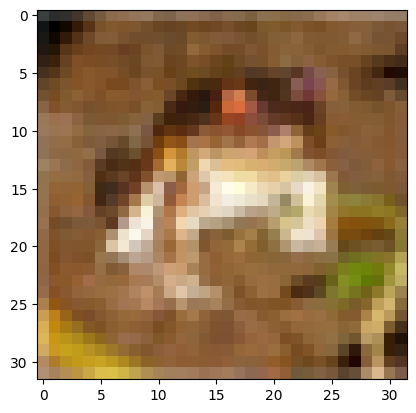

In [4]:
plt.imshow(X_train[0])
images = []

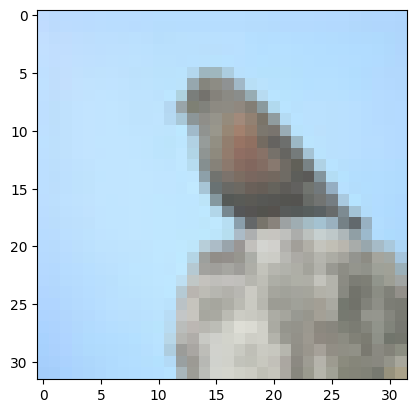

In [8]:
plt.imshow(X_train[np.random.randint(0, 1000)])

Frog extraction

In [7]:
inds = Y_train.flatten() == 6
frogs = X_train[inds, :]
# for i in range(10, 20):
#     plt.imshow(frogs[i])
#     plt.show()

In [17]:
# Normalizing
X_train = X_train/255
X_test = X_test/255
# One-Hot-Encoding
Y_train_en = to_categorical(Y_train,10)
Y_test_en = to_categorical(Y_test,10)

In [9]:
# Base Model - Approximately Le Net-5
model = Sequential()
model.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128, activation ="relu"))
model.add(Dense(10, activation ="softmax"))

optimizer = SGD(0.01)
model.compile(loss ="categorical_crossentropy", optimizer=optimizer, metrics =["accuracy"])

2023-12-16 20:56:12.923709: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-16 20:56:12.923821: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-16 20:56:12.923836: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-16 20:56:12.924484: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-16 20:56:12.924509: I external/local_xla/xla/stream_executor

In [10]:
history = model.fit(X_train, Y_train_en, batch_size=100, epochs = 1000, verbose=1,validation_data=(X_test,Y_test_en))

Epoch 1/1000


2023-12-16 20:56:16.780669: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2023-12-16 20:56:17.075701: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f6458175700 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-16 20:56:17.075741: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Laptop GPU, Compute Capability 8.6
I0000 00:00:1702778177.124559   25804 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


500/500 [==============================] - 6s 7ms/step - loss: 2.2061 - accuracy: 0.2001 - val_loss: 2.0409 - val_accuracy: 0.2642
Epoch 2/1000
500/500 [==============================] - 3s 6ms/step - loss: 1.9440 - accuracy: 0.3015 - val_loss: 1.8452 - val_accuracy: 0.3530
Epoch 3/1000
500/500 [==============================] - 3s 6ms/step - loss: 1.8006 - accuracy: 0.3585 - val_loss: 1.7546 - val_accuracy: 0.3704
Epoch 4/1000
500/500 [==============================] - 3s 6ms/step - loss: 1.6829 - accuracy: 0.4013 - val_loss: 1.6069 - val_accuracy: 0.4285
Epoch 5/1000
500/500 [==============================] - 3s 6ms/step - loss: 1.5899 - accuracy: 0.4320 - val_loss: 1.5627 - val_accuracy: 0.4456
Epoch 6/1000
500/500 [==============================] - 3s 6ms/step - loss: 1.5258 - accuracy: 0.4548 - val_loss: 1.5600 - val_accuracy: 0.4506
Epoch 7/1000
500/500 [==============================] - 3s 6ms/step - loss: 1.4745 - accuracy: 0.4754 - val_loss: 1.4677 - val_accuracy: 0.4754
Epoch

In [11]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(1172.4281045751634, 0.5, 'Error')

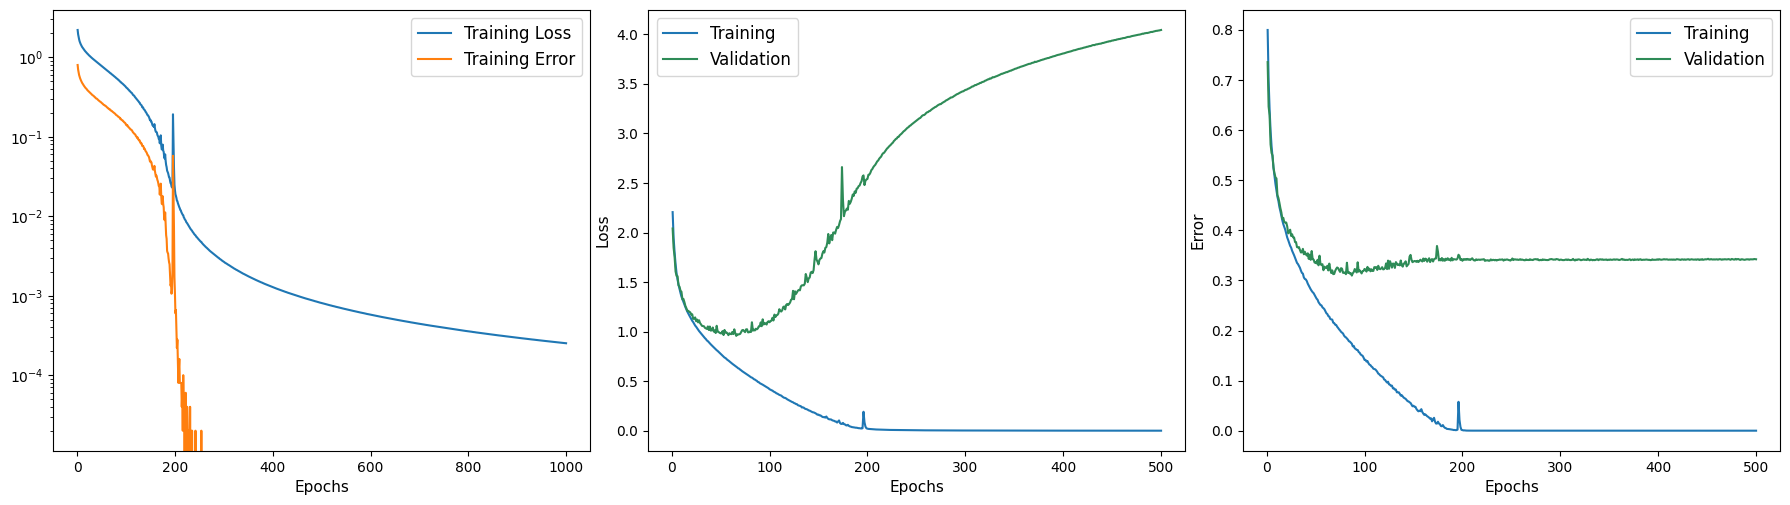

In [102]:
import matplotlib.pyplot as plt
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize = (18, 5))
acc, val_acc = np.array(h["accuracy"]), np.array(h["val_accuracy"])
# h = history.history
epochs = list(range(1, len(h["loss"]) + 1))
fig.tight_layout()
ax0.set_yscale("log")
ax0.plot(epochs, h["loss"], label="Training Loss")
ax0.plot(epochs, 1 - acc, label="Training Error")
ax0.legend(loc="upper right", fontsize=12)
ax0.set_xlabel("Epochs", fontsize=11)
ax1.set_ylabel("Loss", fontsize=11)
ax1.plot(epochs[:500], h["loss"][:500], label="Training")
ax1.plot(epochs[:500], h["val_loss"][:500], label="Validation", color='seagreen')
ax1.legend(loc="upper left", fontsize=12)
ax1.set_xlabel("Epochs", fontsize=11)
ax2.plot(epochs[:500], 1 - acc[:500], label="Training")
ax2.plot(epochs[:500], 1 - val_acc[:500], label="Validation", color='seagreen')
ax2.legend(loc="upper right", fontsize=12)
ax2.set_xlabel("Epochs", fontsize=11)
ax2.set_ylabel("Error", fontsize=11)

After epoch 253 all training examples are correctly classified

In [24]:
import pickle as cPickle
with open(r"AlexNet_50_epochs.pickle", "wb") as output_file:
    cPickle.dump(history.history, output_file)

In [90]:
with open(r"1000_history.pickle", "rb") as input_file:
    h = cPickle.load(input_file)

In [ ]:
n = len(h["loss"])
epochs_last = np.arange(n-9, n+1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (11, 5))
ax1.plot(epochs_last, h["loss"][n-10:], label="loss")
ax1.legend(loc="upper left")
ax2.plot(epochs_last, h["accuracy"][n-10:], label="accuracy")
ax2.legend(loc="upper left")

AlexNet

In [12]:
model = keras.models.Sequential()
model.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=X_train.shape[1:]))
model.add(layers.Conv2D(96, 11, strides=4, padding='same'))
model.add(layers.Lambda(tf.nn.local_response_normalization))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(3, strides=2))
model.add(layers.Conv2D(256, 5, strides=4, padding='same'))
model.add(layers.Lambda(tf.nn.local_response_normalization))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(3, strides=2))
model.add(layers.Conv2D(384, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(384, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(256, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 56, 56, 96)        34944     
                                                                 
 lambda (Lambda)             (None, 56, 56, 96)        0         
                                                                 
 activation (Activation)     (None, 56, 56, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 256)         614656    
                                                      

In [ ]:
optimizer = SGD(0.01)
model.compile(loss ="categorical_crossentropy", optimizer=optimizer, metrics =["accuracy"])

In [ ]:
history = model.fit(X_train, Y_train_en, batch_size=100, epochs = 150, verbose=1,validation_data=(X_test,Y_test_en))

In [61]:
h3 = dict(loss = [], val_loss = [], accuracy = [], val_accuracy = [])
file1 = open('output.txt', 'r')
for line in file1:
    line = line[:-1]
    if not line.startswith("Epoch"):
        first_split = line[60:].split(" - ")
        for s in first_split:
            [label, value] = s.split(": ")
            h3[label].append(float(value))
            

In [82]:
h5 = dict(loss = [], val_loss = [], accuracy = [], val_accuracy = [])
for i, label in enumerate(h3.keys()):
    h5[label] = h4[label] + h3[label]

Text(1172.4281045751634, 0.5, 'Error')

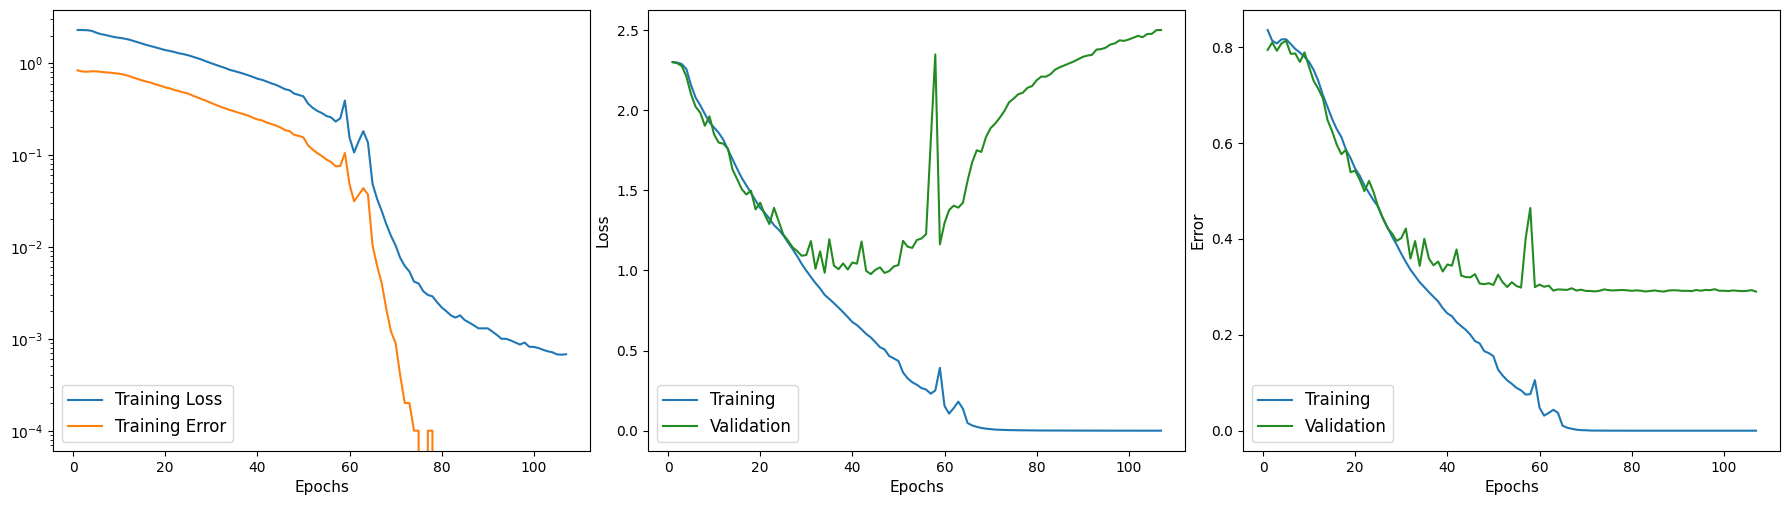

In [104]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize = (18, 5), sharex=True)
acc, val_acc = np.array(h5["accuracy"]), np.array(h5["val_accuracy"])
h = history.history
epochs = list(range(1, len(h5["loss"]) + 1))
fig.tight_layout()
ax0.set_yscale("log")
ax0.plot(epochs, h5["loss"], label="Training Loss")
ax0.plot(epochs, 1 - acc, label="Training Error")
ax0.legend(loc="lower left", fontsize=12)
ax0.set_xlabel("Epochs", fontsize=11)
# ax0.set_ylabel("Loss", fontsize=11)
ax1.set_ylabel("Loss", fontsize=11)
ax1.plot(epochs, h5["loss"], label="Training")
ax1.plot(epochs, h5["val_loss"], label="Validation", color='forestgreen')
ax1.legend(loc="lower left", fontsize=12)
ax1.set_xlabel("Epochs", fontsize=11)
ax2.plot(epochs, 1 - acc, label="Training")
ax2.plot(epochs, 1 - val_acc, label="Validation", color='forestgreen')
ax2.legend(loc="lower left", fontsize=12)
ax2.set_xlabel("Epochs", fontsize=11)
ax2.set_ylabel("Error", fontsize=11)

All training examples were classified correctly after 

In [ ]:
for i, s in enumerate(h["accuracy"]):
    print(f"epoch {i}: {s}")